In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

masa = 70
resistencia = 12.5
aceleracion = 10


constante = (resistencia/masa)

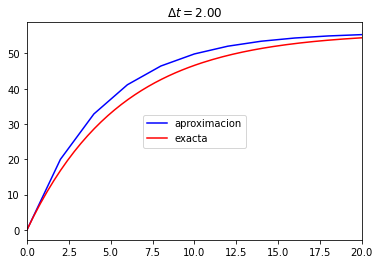

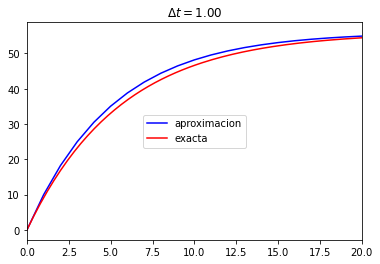

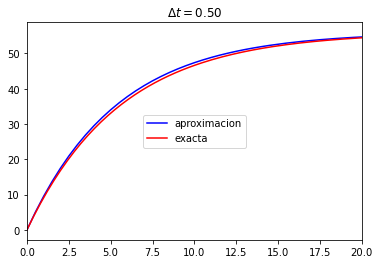

In [2]:
x1 = np.linspace(0,30,150)
y1 = ((aceleracion*masa)/resistencia) * (1 - np.exp(-constante*x1))


deltat = [2, 1, 0.5]


for t in deltat:
    v = [0] ; deltat = float(t); tiempo = [0] ;
    for i in range(0,200):    
         v.append(v[-1] + (aceleracion - constante*v[-1]) * deltat)
         tiempo.append(tiempo[-1] + deltat)
    plt.plot(tiempo,v, 'b',label = 'aproximacion')
    plt.plot(x1,y1,'r', label = 'exacta')
    plt.legend(loc = 'center')
    plt.xlim(0,20)
    #mdf_comment: les ponemos título para identificar el delta t:
    plt.title('$\Delta t = ${:4.2f}'.format(t))
    plt.show()



In [3]:
# La parte c no supe como discretizar la solucion

Pensemos cómo cambia la ecuación:

$$ \mathbf{F_{roz}} = -c v^2 = m \frac{d v}{dt} $$

por lo tanto la función característica de la ecuación es 
$$ \frac{d v}{dt} = F(t, v) = g - \frac{c}{m} v^2 $$

si discretizamos a lo bruto:

$$ v_{i+1} = v_i + dt \left( g - \frac{c}{m} v^2 \right) $$ 

La forma correcta de hacerlo es hacer una función que asigne la forma del rozamiento y no copiar el código, pero copio y pego tu código cambiando solo la parte pertinente:

In [4]:
import pdb

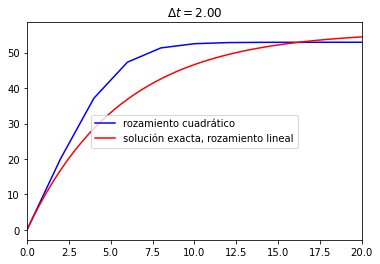

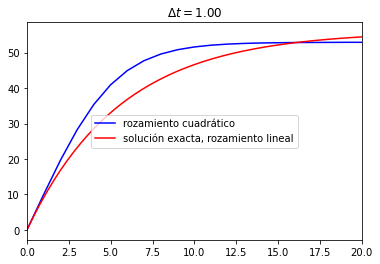

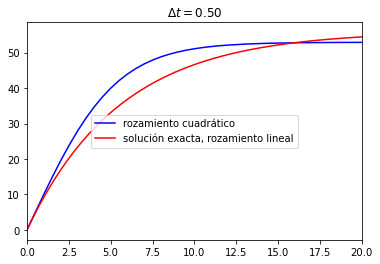

In [5]:
x1 = np.linspace(0,30,150)
y1 = ((aceleracion*masa)/resistencia) * (1 - np.exp(-constante*x1))
#mdf_comment la solucion teórica ya no vale pero podemos dejarla para ver como cambia el asunto.
c = 0.25
constante2 = c / masa

deltat = [2, 1, 0.5]


for t in deltat:
    v = [0] ; deltat = float(t); tiempo = [0] ;
    for i in range(0,200):
        try:
            v.append(v[-1] + deltat*(aceleracion - constante2*v[-1]**2) )
            tiempo.append(tiempo[-1] + deltat)
        except OverflowError:
            pdb.set_trace()
            pass
    plt.plot(tiempo,v, 'b',label = 'rozamiento cuadrático')
    plt.plot(x1,y1,'r', label = 'solución exacta, rozamiento lineal')
    plt.legend(loc = 'center')
    plt.xlim(0,20)
    #mdf_comment: les ponemos título para identificar el delta t:
    plt.title('$\Delta t = ${:4.2f}'.format(t))
    plt.show()



# Preguntas:

1. ¿ cuánto mejoran las aproximaciones a menor $\delta t$ ?
2. ¿ hasta qué punto conviene seguir iterando ?